<h1>Introduction to the Numerical Computation of Singular Value Decomposition</h1>

The following code first implements the following numerical methods: 


1.   Power Iteration
2.   Rayleigh Quotient
3. Hotelling Deflation

Then using the results from the methods mentioned above, we calculate the Singular Value Decomposition (SVD) of the required matrix.

To run the example, click on each of the following code-blocks and press the "run"-button in the menu on top of this page. <br/>
Follow the comments in each code-block to understand the commands executed in each step.

In [81]:
# Necessary imports
import numpy as np
import random as random
import math

<h3> A. Power Iteration </h3>
Purpose: Calculating the largest eigenvector of matrix A using convergence using the following formula.

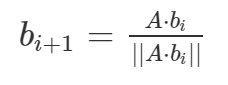

In [82]:
def power_iteration(A, number_of_iterations):

  # b_k is random vector with row-size of A. This vector will converge against the largest eigenvector of given data matrix
  b_k = np.random.rand(A.shape[1])

  for i in range(number_of_iterations):
    b_k = (np.matmul(A,b_k))/(np.linalg.norm(np.matmul(A,b_k)))

  return b_k

<h3> B. Rayleigh Quotient </h3>
Purpose: Calculating the eigenvalue 'r' corresponding to a given eigenvector 'x' using the following formula.

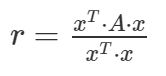

In [83]:
def rayleigh_quotient(A, eigenvector_x):
  r = np.matmul(eigenvector_x.transpose(), np.matmul(A, eigenvector_x))/np.matmul(eigenvector_x.transpose(),eigenvector_x)
  return r

<h3> C. Hotelling Deflation </h3>
Purpose: Update the given matrix 'Ai' to calculate the next largest eigenvector with Power Iteration.

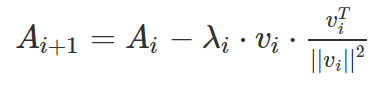

In [84]:
def hotelling_deflation(A, eigenvalue, eigenvector):
  deflated_matrix = A - eigenvalue * np.outer(eigenvector, (eigenvector/(np.linalg.norm(eigenvector) * np.linalg.norm(eigenvector))))
  return deflated_matrix

Formulae to generate the matrices U and V, using singular values sigma and the normalized eigenvectors

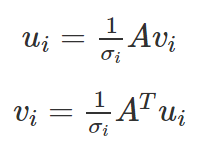

In [85]:
# Function to construct matrix U from V
def construct_U(Sigma, A, V):

  # Defining matrix U of size mxm
  U = np.zeros((len(A), len(A)))

  for i in range(len(A)):
      U[:,i] = np.divide(A.dot(V[:,i]),Sigma[i][i])
  return U


# Function to construct matrix V from U
def construct_V(Sigma, A, U):

  # Defining matrix V of size nxn
  V = np.zeros((len(A[0]), len(A[0])))

  for i in range(len(A[0])):
      V[:,i] = np.divide(np.transpose(A).dot(U[:,i]),Sigma[i][i])
  return V

<h2> Numerical Computation of Singular Value Decomposition </h3>


In [86]:
A = np.array([[11, 12, 19, 7, 3],
              [1, 15, 9, 2, 4],
              [4, 16, 12, 5, 2],
              [14, 7, 2, 15, 6]])


# Use AtA if m<n
if len(A) < len(A[0]):
  A1 = np.matmul(np.transpose(A), A)

# Use AAt if m>=n
else:
  A1 = np.matmul(A, np.transpose(A))

print(A1)

eig_vectors = [None]*len(A1)
eig_values = [None]*len(A1)

[[334 309 294 309 129]
 [309 674 569 299 170]
 [294 569 590 241 129]
 [309 299 241 303 129]
 [129 170 129 129  65]]


In [87]:
# Specifying the number of iterations for power iteration
number_of_iterations = 100
current_matrix = A1

for i in range(len(current_matrix)):

  # Function call to get the i-th dominant eigenvector
  eig_vectors[i] = power_iteration(current_matrix, number_of_iterations)

  # Function call to get the corresponding eigenvalue
  eig_values[i] = rayleigh_quotient(current_matrix, eig_vectors[i] )

  print("\nEigenvalue " + str(i+1) + ":\n" + str(np.round(eig_values[i], 3)))
  print("\nNormalized eigenvector " + str(i+1) +":\n" + str(np.round(eig_vectors[i], 3)))
  print("___________________________________________________________________________________")
  
  # Deflating the matrix to calculate the next eigenvector using Power Iteration
  if i<len(A1)-1:
    deflated_matrix = hotelling_deflation(current_matrix, eig_values[i], eig_vectors[i])
  current_matrix = deflated_matrix


Eigenvalue 1:
1606.108

Normalized eigenvector 1:
[0.384 0.616 0.563 0.354 0.177]
___________________________________________________________________________________

Eigenvalue 2:
282.642

Normalized eigenvector 2:
[ 0.564 -0.349 -0.426  0.594  0.161]
___________________________________________________________________________________

Eigenvalue 3:
73.567

Normalized eigenvector 3:
[ 0.324 -0.631  0.643 -0.151 -0.245]
___________________________________________________________________________________

Eigenvalue 4:
3.683

Normalized eigenvector 4:
[ 0.077 -0.159  0.066 -0.366  0.911]
___________________________________________________________________________________

Eigenvalue 5:
-0.0

Normalized eigenvector 5:
[0.35  0.746 0.542 0.121 0.107]
___________________________________________________________________________________


In [88]:
# Constructing mxn matrix Sigma from the acquired eigenvalues
Sigma = np.zeros((len(A),len(A[0])))

for i in range(min(len(A),len(A[0]))):
  Sigma[i,i] = np.sqrt(eig_values[i])

# Constructing U first if m<n
if len(A) < len(A[0]):
  V = np.column_stack(eig_vectors)
  U = construct_U(Sigma, A, V)

# Constructing V first if m>=n
else:
  U = np.column_stack(eig_vectors) 
  V = construct_V(Sigma, A, U)

print("\nU = \n", str(np.round(U,3)))  
print("\nSigma = \n", str(np.round(Sigma,3)))
print("\nV = \n", str(np.round(V,3)))


U = 
 [[ 0.632 -0.086  0.747  0.187]
 [ 0.402 -0.397 -0.541  0.623]
 [ 0.506 -0.307 -0.272 -0.759]
 [ 0.429  0.861 -0.272  0.036]]

Sigma = 
 [[40.076  0.     0.     0.     0.   ]
 [ 0.    16.812  0.     0.     0.   ]
 [ 0.     0.     8.577  0.     0.   ]
 [ 0.     0.     0.     1.919  0.   ]]

V = 
 [[ 0.384  0.564  0.324  0.077  0.35 ]
 [ 0.616 -0.349 -0.631 -0.159  0.746]
 [ 0.563 -0.426  0.643  0.066  0.542]
 [ 0.354  0.594 -0.151 -0.366  0.121]
 [ 0.177  0.161 -0.245  0.911  0.107]]


In [89]:
# Verifying our results of the SVD calculation
print("\n Input matrix A = \n" + str(A))
print("\n Matrix A computed from SVD = \n" + str(np.round(np.matmul(U,np.matmul(Sigma,V.transpose())),3))) 


 Input matrix A = 
[[11 12 19  7  3]
 [ 1 15  9  2  4]
 [ 4 16 12  5  2]
 [14  7  2 15  6]]

 Matrix A computed from SVD = 
[[11. 12. 19.  7.  3.]
 [ 1. 15.  9.  2.  4.]
 [ 4. 16. 12.  5.  2.]
 [14.  7.  2. 15.  6.]]
